<a href="https://colab.research.google.com/github/BurleighCharlton/Python-Mathematics/blob/main/Prime_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prime Exploration

By Conrad Ainslie, Akshita Bafna, Burleigh Charlton, Yang, Li, Kevin Nguyen

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import li
from PIL import Image, ImageDraw # Load the package.
import math 

In [3]:
#stuff we have 'borrowed' from marty
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= np.sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags


def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

def primes_upto(x,primes):
  '''
  Gives primes up to x from a list of primes, primarily used as pi(x), the prime counting function.
  '''
  return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

In [4]:
def sum1(x, n):
  '''
  our first sum in log int
  '''
  sum=0
  for i in range(1,n):
    term = ((-1)**(i-1) * np.log(x)**i)/(np.factorial(i)* 2**(i-1))
    sum = sum + term
  return sum

In [ ]:
gamma = 0.57721 56649 01532 

def log_int(x, n):
  '''
  takes an x and computes the log integal series rep at that point
  to degree of accuracy nK
  '''
  gamma
  + np.log(np.log(x))
  +np.sqrt(x) * 





SyntaxError: ignored

#Burleighs PIL corner

Idea 1   
using fermat test $$a^{n-1} mod (n) = 0$$
1.   init all black square
2.   check all numbers with fermat test a=2
3.   Color all that pass a=2 with red, a=3 green, and a=5 blue
4.   Now we have a map of mostly white values 
5.   Overlay a cyan color at every true prime

I have also created a gif to show this in motion with an increasing cyan color density




Here I create a prime list and a bigger prime list in the form of a numpy array for use in imaging

In [12]:
primelist100000 = np.asarray(where(isprime_list(100000)))
bigprimelist = np.asarray(where(isprime_list(1024*1024)))

This is a codeblock that Shows all of the primes from the seive

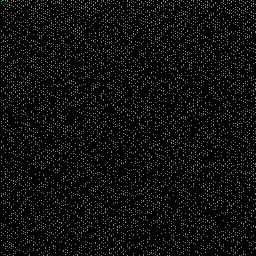

In [ ]:
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
      if (x+(256*y) in primelist100000):
        primesquare[y,x] = [0,180,180]

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

Here is my implementation of the fermat test   
It takes a number to test and a value to witness primes until   
e.g.   
an input of 67,5 would attempt to witness a = 2,3,5,7,13 against 67 a nd produce an array of 1s and 0s indicating if witnessing occured or not

In [8]:
def fermat_test(n, a):
  '''
  takes a number n to test
  and the first  as a witness
  returns true if a witness n as prime
  a^n-1 mod n = 0 is evidence for primality
  fermat_test: num, num -> array 
  '''
  if n==0:
    return np.zeros((1,a))
  results = np.zeros( (1,a) )
  index=0
  for i in primelist100000[0:a]:
    results[0,index] = (pow(int(i), n-1, n) == 1)
    index+=1
  return results


Testing

In [ ]:
print(fermat_test(5,1))
print(pow(2,4,5))

[[1.]]
1


Here I create a small list of fermat tuples into an array
Its stuctured

In [19]:
#generates an array of 10 tuples 1 by 256*256 in length
#tuples are the results of the fermat test on the first 10 primes
list_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,256*256)])

print(list_of_fermat_tests_to_10[2][0,0:3])
print((list_of_fermat_tests_to_10[2])[0,3:6])
print((list_of_fermat_tests_to_10[2])[0,6:9])

[0. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


Here are larger lists, one to 10 and the other using only the first 3 primes

In [18]:
biglist_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,1024*1024)])

In [9]:
biglist_of_fermat_tests_to_3 = np.asarray([fermat_test(i,3) for i in range(0,1024*1024)])

Here is that same square but with fermat tests

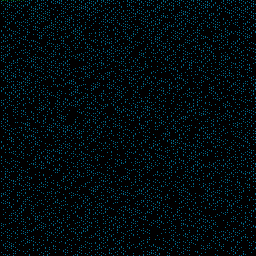

In [22]:
##This generates a list of primes by my fermat test
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
        primesquare[y,x] = [0,100,(100*np.count_nonzero(list_of_fermat_tests_to_10[(256*y)+x][] ==1))] # Red = y, Green = 0, Blue = 1-y
        if (x+(256*y) not in bigprimelist):
          primesquare[y,x] = [0,0,0]

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

Here is the first implementation. This maps the first 4 primes to red, the next three green, and the others to blue among the first 10 primes, which should realy be changed to make more sense as I mixed up my array endings I should do 9

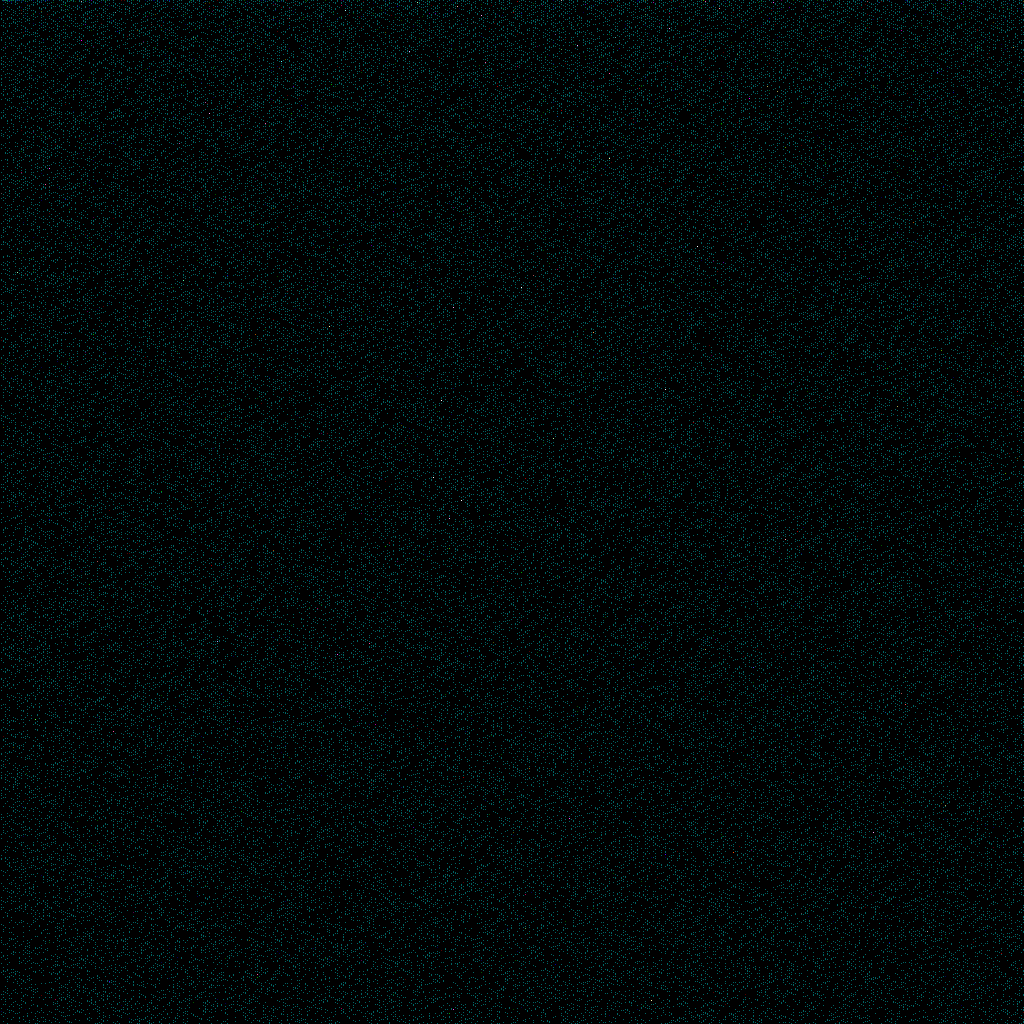

In [59]:
##by segments of primes
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        primesquare[y,x] = [83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,0:3] ==1)), #add red if witnessed by first 3 primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,3:6] ==1)), #add green if witnessed by next three primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,6:9] ==1))] #add blue if witnessed by next three primes
        if (x+(1024*y) in bigprimelist):
          primesquare[y,x] = [0,100,100] 

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

This is a rather interesting image.   
First we iterate through applying the fermat test to each pixel with a = 2, 3, 5, and coloring pixels that pass that primality test red, green, and blue respectively. This will net us some results of various colors as well as combinations.   
Next we layer on a cyan color on every true prime.   
What this shows us are the carmichael numbers of the three tests that we have run. Pixels that are red are not truly primes, but are instead.

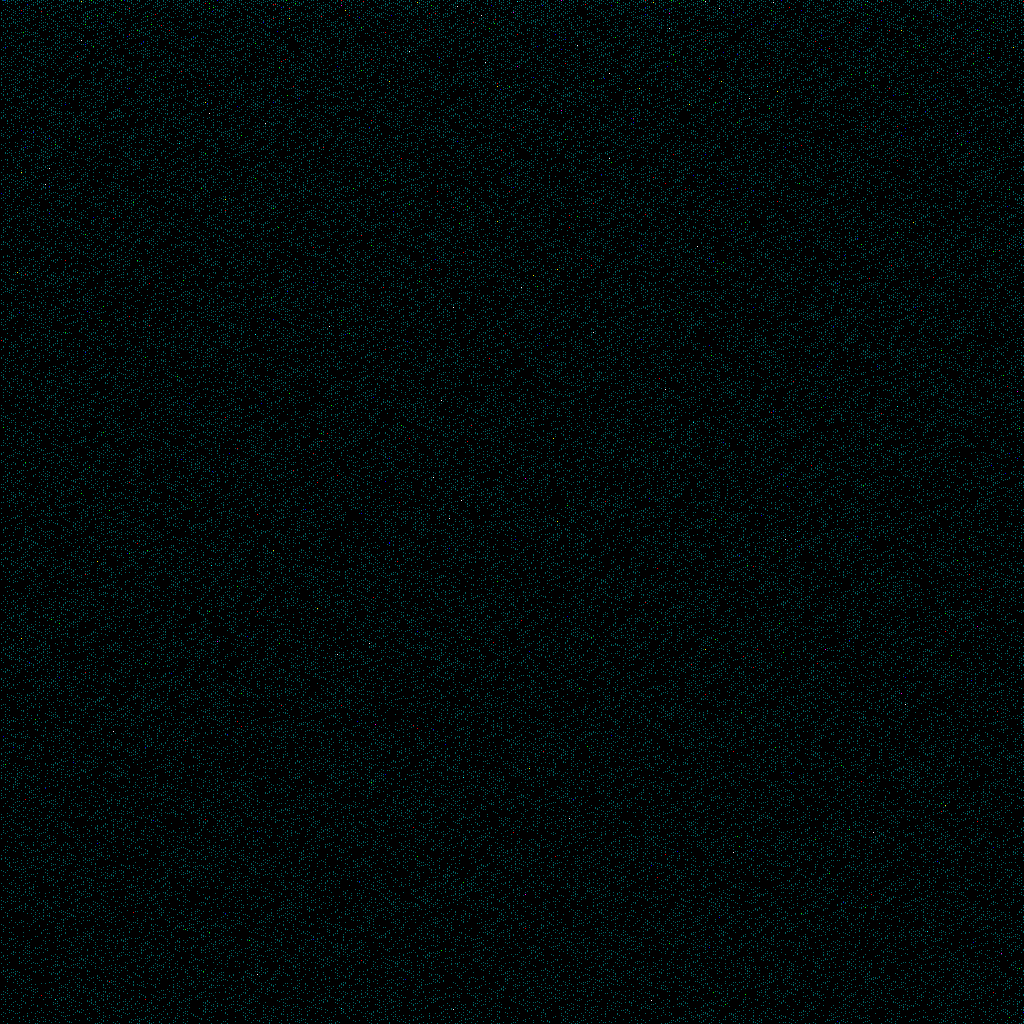

In [58]:
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
        primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes
        if (x+(1024*y) in bigprimelist):
          primesquare[y,x] = [0,100,100] # Red = y, Green = 0, Blue = 1-y

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

This is a function that makes boxes as above, but takes an input for how dense the cyan color should be   
it is for use in the gif making

In [50]:
def makeprimesquare(d):
  '''
  makes a prime square of fermat numbers
  then places true primes of d color density
  '''    
  primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
  for x in range(1024):
      for y in range(1024):
            primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                                250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                                250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes
            if (d>51):          
              if (x+(1024*y) in bigprimelist):
                primesquare[y,x] = [0,d,d] # Red = y, Green = 0, Blue = 1-y

  img = Image.fromarray(primesquare) # Create an image from the array.
  return img

This generates a gif of growing cyan color on the true primes 

In [57]:
images = []

max_color = 200
step = 25
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)

for i in range(0, max_color, step):
    im = makeprimesquare(i)
    img = Image.fromarray(primesquare) # Create an image from the array.
    images.append(im)

images[0].save('primes.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=400, loop=0)

In [33]:
display(test.gif)

NameError: ignored

# Conrad's stuff


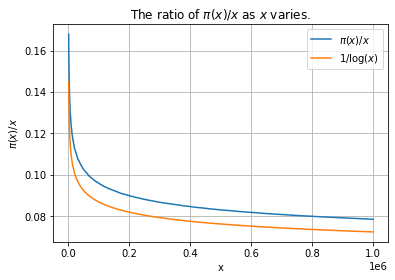

In [ ]:
x_values = np.linspace(0,1000000,1001) # The numpy array [0,1000,2000,3000,...,1000000]
primelist1000000 = (where(isprime_list(1000000)))
pix_values = np.array([primes_upto(x,primelist1000000) for x in x_values])  # [FUNCTION(x) for x in LIST] syntax
m_values = pix_values[1:] / x_values[1:]
plt.plot(x_values[1:], m_values, label='$\pi(x)/x$')  # The same as the plot above.
plt.plot(x_values[1:], 1 / np.log(x_values[1:]), label='$1 / \log(x)$')  # Overlay the graph of 1 / log(x)
plt.title('The ratio of $\pi(x) / x$ as $x$ varies.')
plt.xlabel('x')
plt.ylabel('$\pi(x) / x$')
plt.grid(True)
plt.legend()  # Turn on the legend.
plt.show()